# Audio Spectrum by Python
2021.1.9

## Record the audio by PyAudio
record the audio to "output.wav"

In [23]:
import pyaudio
import wave

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

# Use the PyAudio class to create a object named stream
# Init
stream = p.open(format=FORMAT,  # the format of sound
                channels=CHANNELS, #sound channels
                rate=RATE, # sampling_rate
                input=True, # set input to True represent recording audio instead of play
                frames_per_buffer=CHUNK)

print("* recording")
frames = []
# put the read data to "frames", Start recording
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")
stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


## Import file

In [24]:
import librosa
AUDIO_FILE = 'output.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

from IPython.display import Audio
Audio(samples, rate=sample_rate)

## Audio plot

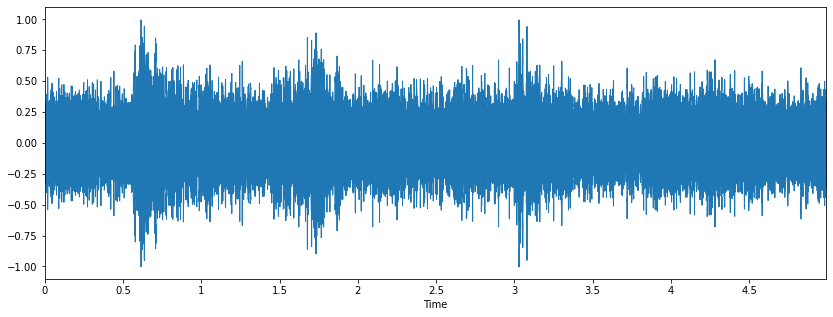

In [25]:
import librosa.display
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

## Spectrum FFT

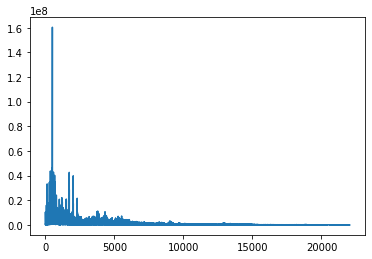

In [26]:
from scipy.fft import rfft, rfftfreq
import numpy as np

N = len(samples)
normalized_tone = np.int16((samples / samples.max()) * 32767)
yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

## MEL_Scale Plot

In [27]:
# use the mel-scale instead of raw frequency
import numpy as np
sgram = librosa.stft(samples)
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
# librosa.display.specshow(mel_scale_sgram)

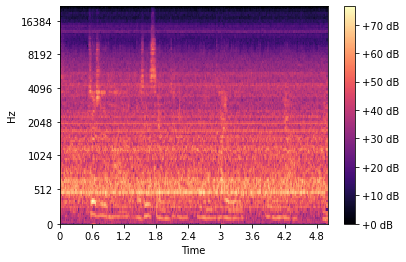

In [28]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')